In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Index in Pandas

In pandas, an **`index`** acts as a row identifier in a DataFrame or Series. It is a label or set of labels that uniquely identify each row, similar to a primary key in a database table. The index is used to access, filter, and manipulate rows efficiently.

Key characteristics of a pandas index:

*  **Default Index:** If you don't specify an index when creating a DataFrame, pandas will automatically create a default integer index starting from 0.

*  **Custom Index:** You can assign a custom index based on one or more columns of your data, such as dates, unique IDs, or other meaningful labels.

*  **Row Selection:** The index is used to select or filter rows. For example, using .loc[] or .iloc[] enables you to locate rows by index labels or positions.

*  **Uniqueness:** Although an index can contain duplicate values, unique indexes are often more efficient for lookups and operations.

*  **MultiIndex:** pandas also supports hierarchical (multi-level) indexing, where the index consists of multiple levels, providing more complex row identification.

Let'd read the drinks dataset again, pandas automatically assing index values starting from `0 to n-1 (n is the row number)`.

In [ ]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


As told before, we can assign a custom index based on one or more columns of your data, such as dates, unique IDs, or other meaningful labels. We can do this with **`df.set_index(columnName)`** method.


The following code cell will return a new DataFrame, and does not change the original one.

In [ ]:
drinks.set_index("country")

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa
...,...,...,...,...,...
Venezuela,333,100,3,7.7,South America
Vietnam,111,2,1,2.0,Asia
Yemen,6,0,0,0.1,Asia


In [ ]:
drinks.head() # index is still same as previous

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


If you want to change the original DataFrame we can either assing the returning DataFrame to the original one, or we can use **`inplace`** parameter.

In [ ]:
# drinks.set_index("country") # or

drinks.set_index("country", inplace=True)
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In the previous result, you will see that country is not a regular column, instead it is the index of the dataframe. Let's verify this:

In [ ]:
drinks.columns

Index(['beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
drinks.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

If you re-try to assign **`country`** column as index, you will get runtime error since there is no such column called **`country`** right now.

In [ ]:
drinks.set_index("country", inplace=True)

KeyError: "None of ['country'] are in the columns"

# `loc` and `iloc` methods

In pandas, **`.loc`** and **`.iloc`** are used to access rows and columns in a DataFrame, but they operate in different ways:

## 1. loc (Label-based Indexing)

*  **Purpose:** ***.loc*** is used to access rows and columns using labels or boolean conditions.
*  **Syntax:** **`df.loc[row_label, column_label]`**

In [ ]:
# returns the row where the index label is "Turkey"

drinks.loc["Turkey"]

,Turkey
beer_servings,51
spirit_servings,22
wine_servings,7
total_litres_of_pure_alcohol,1.4
continent,Asia


In [ ]:
# returns the row where the index label is "Turkey"
# and column name is "beer_servings"

drinks.loc["Turkey", "beer_servings"]

51

In [ ]:
# you can even change the value with loc and iloc

drinks.loc["Turkey", "beer_servings"] = 55

drinks.loc["Turkey", "beer_servings"]

55

In [ ]:
drinks.loc["Turkey"]

,Turkey
beer_servings,55
spirit_servings,22
wine_servings,7
total_litres_of_pure_alcohol,1.4
continent,Asia


In [ ]:
# returns the 'beer_servings' column for rows with index from "Argentina" to "Brazil", including both endpoints.
drinks.loc["Argentina":"Brazil", "beer_servings"]

,beer_servings
country,
Argentina,193
Armenia,21
Australia,261
Austria,279
Azerbaijan,21
Bahamas,122
Bahrain,42
Bangladesh,0
Barbados,143


In [ ]:
# returns the 'beer_servings' column for rows with index is "Argentina" or "Brazil"
drinks.loc[["Argentina","Brazil"], "beer_servings"]

,beer_servings
country,
Argentina,193
Brazil,245


In [ ]:
# returns the 'beer_servings' and 'wine_servings columns for rows with index
# from "Argentina" to "Brazil", including both endpoints.

drinks.loc["Argentina":"Brazil", ["beer_servings", "wine_servings"]]

,beer_servings,wine_servings
country,,
Argentina,193,221
Armenia,21,11
Australia,261,212
Austria,279,191
Azerbaijan,21,5
Bahamas,122,51
Bahrain,42,7
Bangladesh,0,0
Barbados,143,36


In [ ]:
# returns the columns from 'beer_servings' to 'wine_servings (both included)
# for rows with index from "Argentina" to "Brazil" (with stepsize as 2)
# including both endpoints.

drinks.loc["Argentina":"Brazil":2, "beer_servings":"wine_servings"]

,beer_servings,spirit_servings,wine_servings
country,,,
Argentina,193,25,221
Australia,261,72,212
Azerbaijan,21,46,5
Bahrain,42,63,7
Barbados,143,173,36
Belgium,295,84,212
Benin,34,4,13
Bolivia,167,41,8
Botswana,173,35,35


## 2. iloc (Integer Position-based Indexing)

*  **Purpose:** **`.iloc`** is used to access rows and columns using integer positions (like Python indexing).
*  **Syntax:** **`df.iloc[row_index, column_index]`**
*  Excludes the endpoint when slicing, similar to standard Python behavior.

In [ ]:
# let's get the Turkey's beer_servings with iloc
# first find the integer index of Turkey

row_idx = list(drinks.index).index("Turkey") # we need to conver to a list to use index()
column_idx = list(drinks.columns).index("beer_servings")
drinks.iloc[row_idx, column_idx]

55

In [ ]:
drinks.iloc[row_idx:row_idx+1, column_idx]

,beer_servings
country,
Turkey,55


In [ ]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [ ]:
# let's get wine_servings for the first 5 countries with iloc

drinks.iloc[:5, 2]

,wine_servings
country,
Afghanistan,0
Albania,54
Algeria,14
Andorra,312
Angola,45


In [ ]:
# let's get beer_servings and wine_servings for the first 5 countries with iloc
drinks.iloc[:5, [0,2]]

,beer_servings,wine_servings
country,,
Afghanistan,0,0
Albania,89,54
Algeria,25,14
Andorra,245,312
Angola,217,45


index values in a pandas DataFrame do not need to be unique. While having unique index values can be helpful for certain operations like lookups and joins, pandas allows non-unique index values as well.

If you have duplicate index values, some operations, like grouping or slicing, may behave differently. For example, when selecting rows with a specific index label, pandas will return all rows with that label if there are duplicates.

However, if your analysis requires unique identifiers for rows, it's often good practice to ensure that the index is unique. If necessary, you can use the **`reset_index()`** method to create a unique default integer index or manually assign a unique index to your DataFrame.

In [ ]:
# it does not change the dataframe inplace
drinks.reset_index()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [ ]:
drinks.head() # country is still index

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [ ]:
drinks.reset_index(inplace=True)
drinks.head() # now country is a regular column again

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [ ]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
drinks.index

RangeIndex(start=0, stop=193, step=1)

For the following DataFrame, the index values are not unique.

In [ ]:
# Create a DataFrame with a custom index
data = {'Name': ['Alice', 'Bob', 'Charlie', 'Jack'],
        'Age': [25, 30, 35, 28]}
df = pd.DataFrame(data, index=['A', 'B', 'C', 'B'])
df

,Name,Age
A,Alice,25
B,Bob,30
C,Charlie,35
B,Jack,28


In [ ]:
df.loc['B', 'Name'] # it returns both Bob and Jack

,Name
B,Bob
B,Jack


Let's see an example of **MultiIndex** where the index consists of multiple levels, providing more complex row identification.

In [ ]:
ufos = pd.read_csv("http://bit.ly/uforeports")
ufos.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufos.groupby(["City", "Shape Reported"]).size()

City                                 Shape Reported
Abbeville                            DISK              1
Aberdeen                             CIRCLE            1
                                     CYLINDER          1
                                     DISK              1
                                     FIREBALL          2
                                                      ..
none                                 SPHERE            1
not shure                            CIRCLE            1
observer enroute on MN hwy 61 north  SPHERE            1
on plane wing                        DISK              1
south of the border                  DISK              1
Length: 11593, dtype: int64

In [ ]:
ufos.groupby(["City", "Shape Reported"]).size().index

MultiIndex([(                          'Abbeville',     'DISK'),
            (                           'Aberdeen',   'CIRCLE'),
            (                           'Aberdeen', 'CYLINDER'),
            (                           'Aberdeen',     'DISK'),
            (                           'Aberdeen', 'FIREBALL'),
            (                           'Aberdeen', 'TRIANGLE'),
            (                           'Aberdeen',  'VARIOUS'),
            (                            'Abilene',     'DISK'),
            (                            'Abilene',   'SPHERE'),
            (                            'Abilene', 'TRIANGLE'),
            ...
            (                            'no data',     'OVAL'),
            (                            'no data', 'TEARDROP'),
            (                            'no data', 'TRIANGLE'),
            (                               'none',   'CIRCLE'),
            (                               'none',     'DISK'),
         

In [ ]:
ufos.groupby(["City", "Shape Reported"]).size().index[0]

('Abbeville', 'DISK')

In [ ]:
ufos.groupby(["City", "Shape Reported"]).size().index[0][1]

'DISK'

# Missing Values

Missing values in pandas refer to the data that is absent or not available in a DataFrame or Series. They are used to represent and handle incomplete or undefined data in a dataset. In pandas, missing values are typically represented using **`NaN`** (Not a Number), which is a special floating-point value defined by the IEEE standard.

**Common Causes of Missing Values:**

1.   **Data Entry Errors:** Human errors during data entry.
2.   **Incomplete Data Collection:** Not all fields were filled in during data collection.
3.   **Data Conversion:** Issues when converting data types can lead to missing values.
4.   **Merging Datasets:** When merging datasets that do not have overlapping values.





## Handling Missing Values


1.   Detecting Missing Values
2.   Dropping Missing Values
3.   Filling Missing Values



## 1.   Detecting Missing Values

There are different methods to detect missing values but one of the most common ways is **`isnull()`** method. It returns a boolean DataFrame indicating where values are missing.

In [ ]:
ufos.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufos.isnull()

,City,Colors Reported,Shape Reported,State,Time
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,False,True,False,False,False
...,...,...,...,...,...
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False


In order to find missing value counts for each column, we can use **`sum()`** method (remind that axis is 0 by default). Additionally, `True` is considered as 1, `False` is considered as 0 for addition process.

In [ ]:
# ufos.isnull().sum(axis=0) # or
ufos.isnull().sum()

,0
City,26
Colors Reported,15359
Shape Reported,2644
State,0
Time,0


Let's find total missing value count for whole dataframe

In [ ]:
ufos.isnull().sum().sum()

18029

## 2. Dropping Missing Values

In order to drop missing values, we may use **`dropna()`** function. It has some parameters to be used:


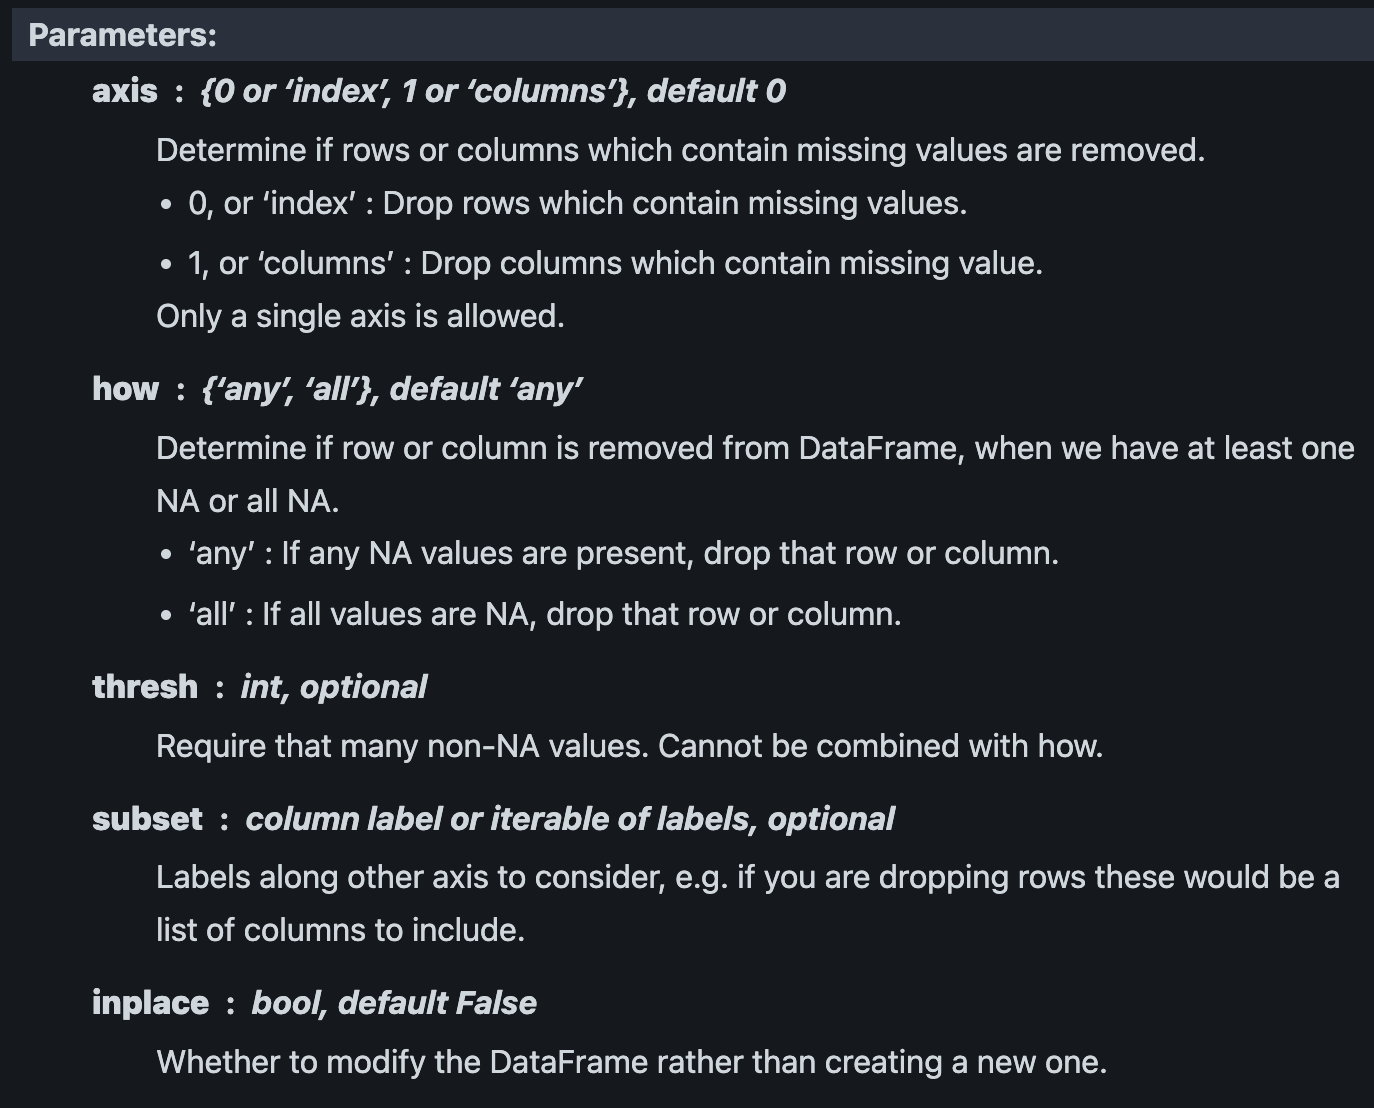


In [ ]:
# check original shape
ufos.shape

(18241, 5)

In [ ]:
# axis=0
# how="any"
ufos.dropna()

,City,Colors Reported,Shape Reported,State,Time
12,Belton,RED,SPHERE,SC,6/30/1939 20:00
19,Bering Sea,RED,OTHER,AK,4/30/1943 23:00
36,Portsmouth,RED,FORMATION,VA,7/10/1945 1:30
44,Blairsden,GREEN,SPHERE,CA,6/30/1946 19:00
82,San Jose,BLUE,CHEVRON,CA,7/15/1947 21:00
...,...,...,...,...,...
18213,Pasadena,GREEN,FIREBALL,CA,12/28/2000 19:10
18216,Garden Grove,ORANGE,LIGHT,CA,12/29/2000 16:10
18220,Shasta Lake,BLUE,DISK,CA,12/29/2000 20:30
18233,Anchorage,RED,VARIOUS,AK,12/31/2000 21:00


In [ ]:
ufos.dropna().shape

(2486, 5)

In [ ]:
ufos.shape

(18241, 5)

In [ ]:
ufos.dropna(axis=1)

,State,Time
0,NY,6/1/1930 22:00
1,NJ,6/30/1930 20:00
2,CO,2/15/1931 14:00
3,KS,6/1/1931 13:00
4,NY,4/18/1933 19:00
...,...,...
18236,IL,12/31/2000 23:00
18237,IA,12/31/2000 23:00
18238,WI,12/31/2000 23:45
18239,WI,12/31/2000 23:45


In [ ]:
ufos.dropna(subset=["Colors Reported", "Shape Reported"], how="any").shape

(2490, 5)

In [ ]:
ufos.dropna(subset=["Colors Reported", "Shape Reported"], how="all").shape

(15989, 5)

## 3. Filling Missing Values

We can use **`fillna(value)`** that replaces missing values with a specified value.

In [ ]:
ufos.isnull().sum()

,0
City,26
Colors Reported,15359
Shape Reported,2644
State,0
Time,0


Let's fill the missing values in **`City`** column with the most frequent city:

In [ ]:
# First find the most frequent city

mostFreq = ufos["City"].value_counts().index[0]
mostFreq

'Seattle'

In [ ]:
# fill the missing values
ufos["City"] = ufos["City"].fillna(mostFreq)

In [ ]:
# check that City doesnt have any missing values
ufos.isnull().sum()

,0
City,0
Colors Reported,15359
Shape Reported,2644
State,0
Time,0


# Duplicated Entries

We will focus on how we can handle duplicated records in pandas:


1.   Identifying Duplicates
2.   Dropping Duplicates



## 1. Identifying Duplicates

*   The **`duplicated()`** method returns a boolean series indicating whether each row is a duplicate of a previous row.

*   By default, it considers all columns for duplication checking. You can specify a subset of columns to check for duplicates with **`subset`** parameter.



In [ ]:
users = pd.read_table("http://bit.ly/movieusers",
                      sep="|",
                      header=None,
                      names=["ID", "Age", "Sex", "Occ", "Zip Code"]
                      )
users.head()

,ID,Age,Sex,Occ,Zip Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
users.duplicated() # considering all columns

,0
0,False
1,False
2,False
3,False
4,False
...,...
938,False
939,False
940,False
941,False


In [ ]:
users.duplicated(subset=["Age"]) # considering specified columns

,0
0,False
1,False
2,False
3,True
4,False
...,...
938,True
939,True
940,True
941,True


The first record (row index 0) was not considered as duplicated in the previous example but the following ones (like row index 3) considered as duplicated (they both have age as 24).

With the following example (changing **`keep`** parameter) the first record (row index 0) was also considered as duplicated. The last record with age as 24 is not considered as duplicated now.

In [ ]:
users.duplicated(subset=["Age"], keep="last") # keep parameter is "first" by default

,0
0,True
1,True
2,True
3,True
4,True
...,...
938,False
939,False
940,False
941,False


In [ ]:
users.duplicated(subset=["Age", "Occ"]) # considering specified columns

,0
0,False
1,False
2,False
3,True
4,False
...,...
938,True
939,True
940,True
941,True


## 2. Dropping Duplicates

*   The **`drop_duplicates()`** method removes duplicate rows from the DataFrame.

*   By default (**`keep='first'`**), it keeps the first occurrence of each duplicate. You can specify **`keep='last'`** to keep the last occurrence or **`keep=False`** to drop all duplicates.



In [ ]:
users.shape

(943, 5)

In [ ]:
users.drop_duplicates() # returns another dataframe

,ID,Age,Sex,Occ,Zip Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
users.drop_duplicates(subset=["Age", "Occ"]) # returns another dataframe

,ID,Age,Sex,Occ,Zip Code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
4,5,33,F,other,15213
5,6,42,M,executive,98101
...,...,...,...,...,...
925,926,49,M,entertainment,01701
928,929,44,M,scientist,53711
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221


In [ ]:
users.shape

(943, 5)

In [ ]:
users.drop_duplicates(subset=["Age", "Occ"], inplace=True) # changes the dataframe inplace
users.shape

(429, 5)

# One-Hot Encoding with Pandas

**`get_dummies()`** in Pandas is a crucial function for converting categorical variables into numerical representations. This is essential for many machine learning algorithms, which often require numerical data for their computations.

Here are some key reasons why you might need to use **`get_dummies()`**:

1.   **Machine Learning Algorithms:** Most machine learning algorithms, such as linear regression, logistic regression, decision trees, and neural networks, expect numerical input. Categorical data, like "male" or "female," "red" or "blue," cannot be directly processed by these algorithms.

2.   **One-Hot Encoding:** **`get_dummies()`** performs one-hot encoding, which creates new binary columns for each category. For example, a categorical variable with three categories ("A," "B," and "C") would be converted into three new columns: "A," "B," and "C." Each row would have a 1 in the column corresponding to its category and 0s in the other columns.

3.   **`Avoiding Ordinality:`** One-hot encoding prevents the algorithm from assuming an ordinal relationship between categories. For example, if a categorical variable has categories "low," "medium," and "high," it would be incorrect to assume that "medium" is halfway between "low" and "high." One-hot encoding treats each category as a separate entity.

4.   **Feature Engineering:** **`get_dummies()`** can be used as a feature engineering technique to create new features that might be more informative for the machine learning model.

5.   **Data Preprocessing:** It's often a necessary step in data preprocessing to ensure that the data is in a suitable format for modeling.

In [109]:
data = {'color': ['red', 'green', 'blue', 'red', 'green']}
df = pd.DataFrame(data)

df

,color
0,red
1,green
2,blue
3,red
4,green


In [110]:
# Convert categorical variable to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['color'])
df_encoded

,color_blue,color_green,color_red
0,False,False,True
1,False,True,False
2,True,False,False
3,False,False,True
4,False,True,False


In [111]:
# Another way of converting categorical variable to numerical using one-hot encoding
df_encoded = pd.get_dummies(df["color"])
df_encoded

,blue,green,red
0,False,False,True
1,False,True,False
2,True,False,False
3,False,False,True
4,False,True,False


In [112]:
# You can even set prefix
df_encoded = pd.get_dummies(df["color"], prefix="Color")
df_encoded

,Color_blue,Color_green,Color_red
0,False,False,True
1,False,True,False
2,True,False,False
3,False,False,True
4,False,True,False


In [113]:
# Drop the first column
df_encoded = pd.get_dummies(df["color"], prefix="Color", drop_first=True)
df_encoded

,Color_green,Color_red
0,False,True
1,True,False
2,False,False
3,False,True
4,True,False


Let's see the titanic data

In [114]:
titanic = pd.read_csv("http://bit.ly/kaggletrain")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's convert Embarked column into one-hot vectors

In [115]:
titanic["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [116]:
temp = pd.get_dummies(titanic["Embarked"], prefix="Embarked")
temp

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


# pd.concat() function

The **`pd.concat()`** function is used to concatenate (or join) two or more DataFrames or Series along a particular axis (rows or columns). It is highly flexible and can handle various types of concatenation scenarios. Especially, **`axis`** parameter is very important and defines the axis along which to concatenate:


*   **`axis=0`** (default): Concatenates along rows (vertically).
*   **`axis=1`**: Concatenates along columns (horizontally).

Remind that we had a similar function in numpy, but it was **`np.concatanate()`**


In [117]:
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})
df1

,A,B
0,1,3
1,2,4


In [118]:
df2

,A,B
0,5,7
1,6,8


In [119]:
res = pd.concat((df1, df2), axis=0)
res

,A,B
0,1,3
1,2,4
0,5,7
1,6,8


In [120]:
# you can set a new index
res = pd.concat((df1, df2), axis=0, ignore_index=True)
res

,A,B
0,1,3
1,2,4
2,5,7
3,6,8


In [121]:
# set axis as 1
res = pd.concat((df1, df2), axis=1)
res

,A,B,A,B
0,1,3,5,7
1,2,4,6,8


Let's go back the titanic data and concat with temp result

In [122]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [123]:
temp.head(3)

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True


In [124]:
# overwrite the titanic dataframe
titanic = pd.concat((titanic, temp), axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,False,True


In [125]:
# maybe we don't need Embarked column any more
titanic.drop("Embarked", axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


# Working with Dates in Pandas

The **`pd.to_datetime()`** function in pandas is used to convert values (like strings, numbers, or even Timestamps) into **datetime** objects. It is a powerful tool for handling date and time data, ensuring that date-related operations such as filtering, indexing, and aggregation can be efficiently performed.

In [126]:
pd.to_datetime("01/07/2022")

Timestamp('2022-01-07 00:00:00')

In [127]:
pd.to_datetime("01.07-2022")

Timestamp('2022-01-07 00:00:00')

In [128]:
# it understands in either way
pd.to_datetime("01.07.2022")

Timestamp('2022-01-07 00:00:00')

In [129]:
# by default its used in US format (month first)
# it is January 7th
pd.to_datetime("01/07/2022")

Timestamp('2022-01-07 00:00:00')

In [130]:
# it is July 1st
pd.to_datetime("01/07/2022", dayfirst=True)

Timestamp('2022-07-01 00:00:00')

In [131]:
t1 = pd.to_datetime("22/05/1996", dayfirst=True)
t1

Timestamp('1996-05-22 00:00:00')

In [132]:
t1.day # an attribute

22

In [133]:
t1.day_name() # a method

'Wednesday'

In [134]:
t1.month

5

In [135]:
t1.month_name()

'May'

In [136]:
t1.year

1996

In [137]:
t2 = pd.to_datetime("01/01/2025")
t2-t1

Timedelta('10451 days 00:00:00')

Let's go back ufos dataset

In [138]:
ufos = pd.read_csv("http://bit.ly/uforeports")
ufos.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [139]:
# as you can see Time is object
ufos.dtypes

,0
City,object
Colors Reported,object
Shape Reported,object
State,object
Time,object


In [140]:
# let's convert it into datetime so we can utilize date features
ufos["Time"] = pd.to_datetime(ufos["Time"])
ufos.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [141]:
ufos.dtypes

,0
City,object
Colors Reported,object
Shape Reported,object
State,object
Time,datetime64[ns]


Now we can use datetime features. Note that we need to use **`dt`** accessor like we did with strings (**`str`** accessor)

In [142]:
ufos["Time"].dt.year

,Time
0,1930
1,1930
2,1931
3,1931
4,1933
...,...
18236,2000
18237,2000
18238,2000
18239,2000


In [143]:
# we can even add day, month, year columns to simplyfy our work although it is
# not necessary

ufos["Day"] = ufos["Time"].dt.day
ufos["Month"] = ufos["Time"].dt.month
ufos["Year"] = ufos["Time"].dt.year

ufos.head()

,City,Colors Reported,Shape Reported,State,Time,Day,Month,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1,6,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,30,6,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,15,2,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1,6,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,18,4,1933


Let's see the number of reports per year

In [144]:
ufos["Year"].value_counts()

,count
Year,
1999,2774
2000,2635
1998,1743
1995,1344
1997,1237
...,...
1936,2
1930,2
1935,1


In the previous result, the result is sorted by frequency values. Let's sort by them year (index) values using **`sort_index()`** method.

In [145]:
ufos["Year"].value_counts().sort_index()

,count
Year,
1930,2
1931,2
1933,1
1934,1
1935,1
...,...
1996,851
1997,1237
1998,1743


Let's plot the result (actually that was the reason why we sorted them by index, to have a better visualisation).

<Axes: xlabel='Year'>

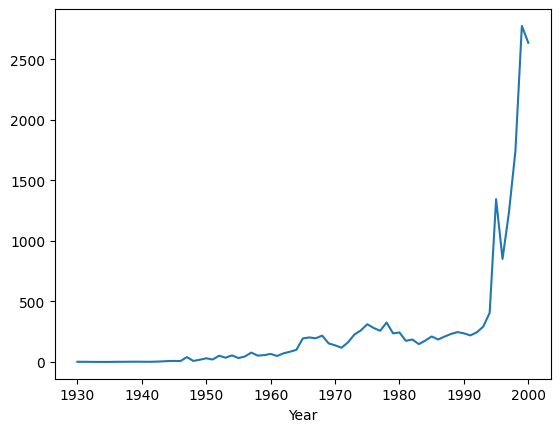

In [146]:
ufos["Year"].value_counts().sort_index().plot()

Similarly, let's plot the number of reports per month with a bar chart. Notice that it's higher in the summer months!

<Axes: xlabel='Month'>

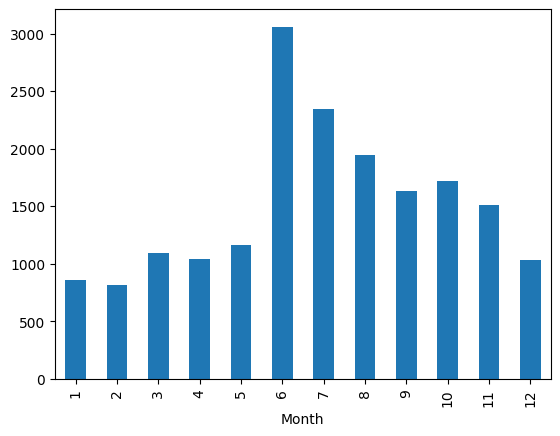

In [147]:
ufos["Month"].value_counts().sort_index().plot(kind="bar")

Plot the number of reports per day of the month with a bar chart.

<Axes: xlabel='Day'>

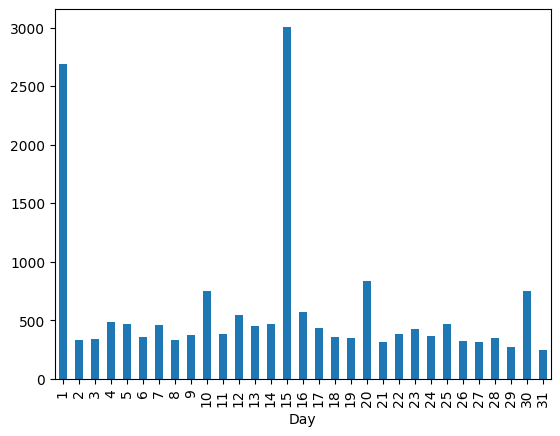

In [148]:
ufos["Day"].value_counts().sort_index().plot(kind="bar")

Plot the number of reports per day name with a bar chart.

<Axes: xlabel='Time'>

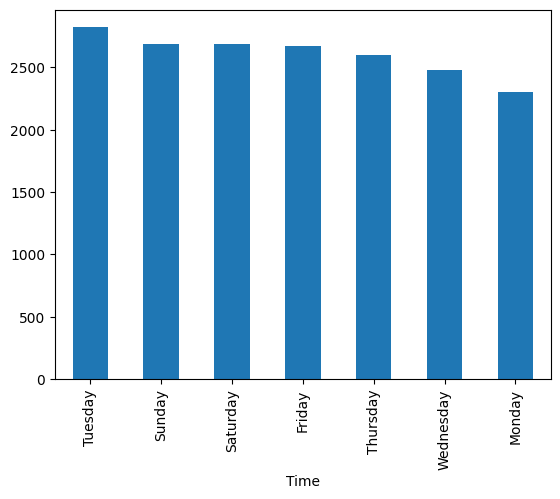

In [149]:
ufos["Time"].dt.day_name().value_counts().plot(kind="bar")

Plot the number of reports per hour with a bar chart.

<Axes: xlabel='Time'>

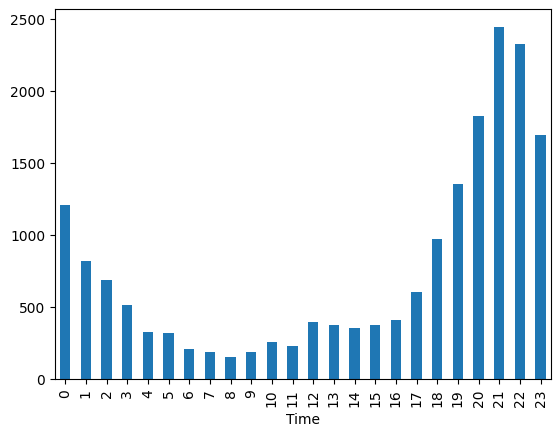

In [150]:
ufos["Time"].dt.hour.value_counts().sort_index().plot(kind="bar")

# **`apply()`** method with Pandas

The **`apply()`** function in pandas allows you to apply a custom function to rows or columns of a DataFrame or to elements of a Series. It is **highly flexible** and often used for transforming data or performing complex operations across data in a vectorized manner.

In [151]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [152]:
def addOne(x):
  return x+1

df['A'].apply(addOne)

,A
0,2
1,3
2,4


In [153]:
df.apply(addOne)

,A,B
0,2,5
1,3,6
2,4,7


Using **`apply()`** with additional arguments

In [154]:
def addSomeValue(x, value):
  return x+value

df['A'].apply(addSomeValue, value=10)

,A
0,11
1,12
2,13


Using apply() with lambda

In [155]:
df["A"].apply(lambda x:x+10)

,A
0,11
1,12
2,13


In [156]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True


Let's find the length of the name for each passenger

In [157]:
# the following will give the total number of rows

len(titanic["Name"])

891

In [158]:
# the following will give the length of the name for each passenger
titanic["Name"].apply(len)

,Name
0,23
1,51
2,22
3,44
4,24
...,...
886,21
887,28
888,40
889,21


Let's find the surname for each passenger. Check that tha pattern is as follows: `**lastName, (title) Name**`

In [159]:
titanic["Name"].str.split(", ")

,Name
0,"[Braund, Mr. Owen Harris]"
1,"[Cumings, Mrs. John Bradley (Florence Briggs T..."
2,"[Heikkinen, Miss. Laina]"
3,"[Futrelle, Mrs. Jacques Heath (Lily May Peel)]"
4,"[Allen, Mr. William Henry]"
...,...
886,"[Montvila, Rev. Juozas]"
887,"[Graham, Miss. Margaret Edith]"
888,"[Johnston, Miss. Catherine Helen ""Carrie""]"
889,"[Behr, Mr. Karl Howell]"


In [160]:
# try to get 0th index, but it will give the first row
titanic["Name"].str.split(", ")[0]

['Braund', 'Mr. Owen Harris']

In [161]:
# try to get 0th index
titanic["Name"].str.split(", ").apply(lambda x:x[0])

,Name
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


In [162]:
# or
titanic["Name"].apply(lambda x:x.split(", ")[0])

,Name
0,Braund
1,Cumings
2,Heikkinen
3,Futrelle
4,Allen
...,...
886,Montvila
887,Graham
888,Johnston
889,Behr


Let's find the people who has "bra" (case-insensitive) in the lastname

In [163]:
# this was you can also get the names (not surnames) that contain "bra" like "Dakic, Mr. Branko"
titanic[titanic["Name"].str.lower().str.contains("bra")]["Name"]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
221,"Bracken, Mr. James H"
444,"Johannesen-Bratthammer, Mr. Bernt"
477,"Braund, Mr. Lewis Richard"
507,"Bradley, Mr. George (""George Arthur Brayton"")"
687,"Dakic, Mr. Branko"
785,"Harmer, Mr. Abraham (David Lishin)"
798,"Ibrahim Shawah, Mr. Yousseff"
824,"Panula, Master. Urho Abraham"


In [164]:
# here is a better solution
titanic[titanic["Name"].apply(lambda x:"bra" in x.lower().split(", ")[0])]["Name"]

,Name
0,"Braund, Mr. Owen Harris"
221,"Bracken, Mr. James H"
444,"Johannesen-Bratthammer, Mr. Bernt"
477,"Braund, Mr. Lewis Richard"
507,"Bradley, Mr. George (""George Arthur Brayton"")"
798,"Ibrahim Shawah, Mr. Yousseff"


# Merging Two DataFrames

The **`merge()`** function in pandas is used to combine two DataFrames based on one or more common columns (or indices). It is similar to SQL joins and provides a highly flexible way to join data from different DataFrames based on keys.

**`pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None)`**

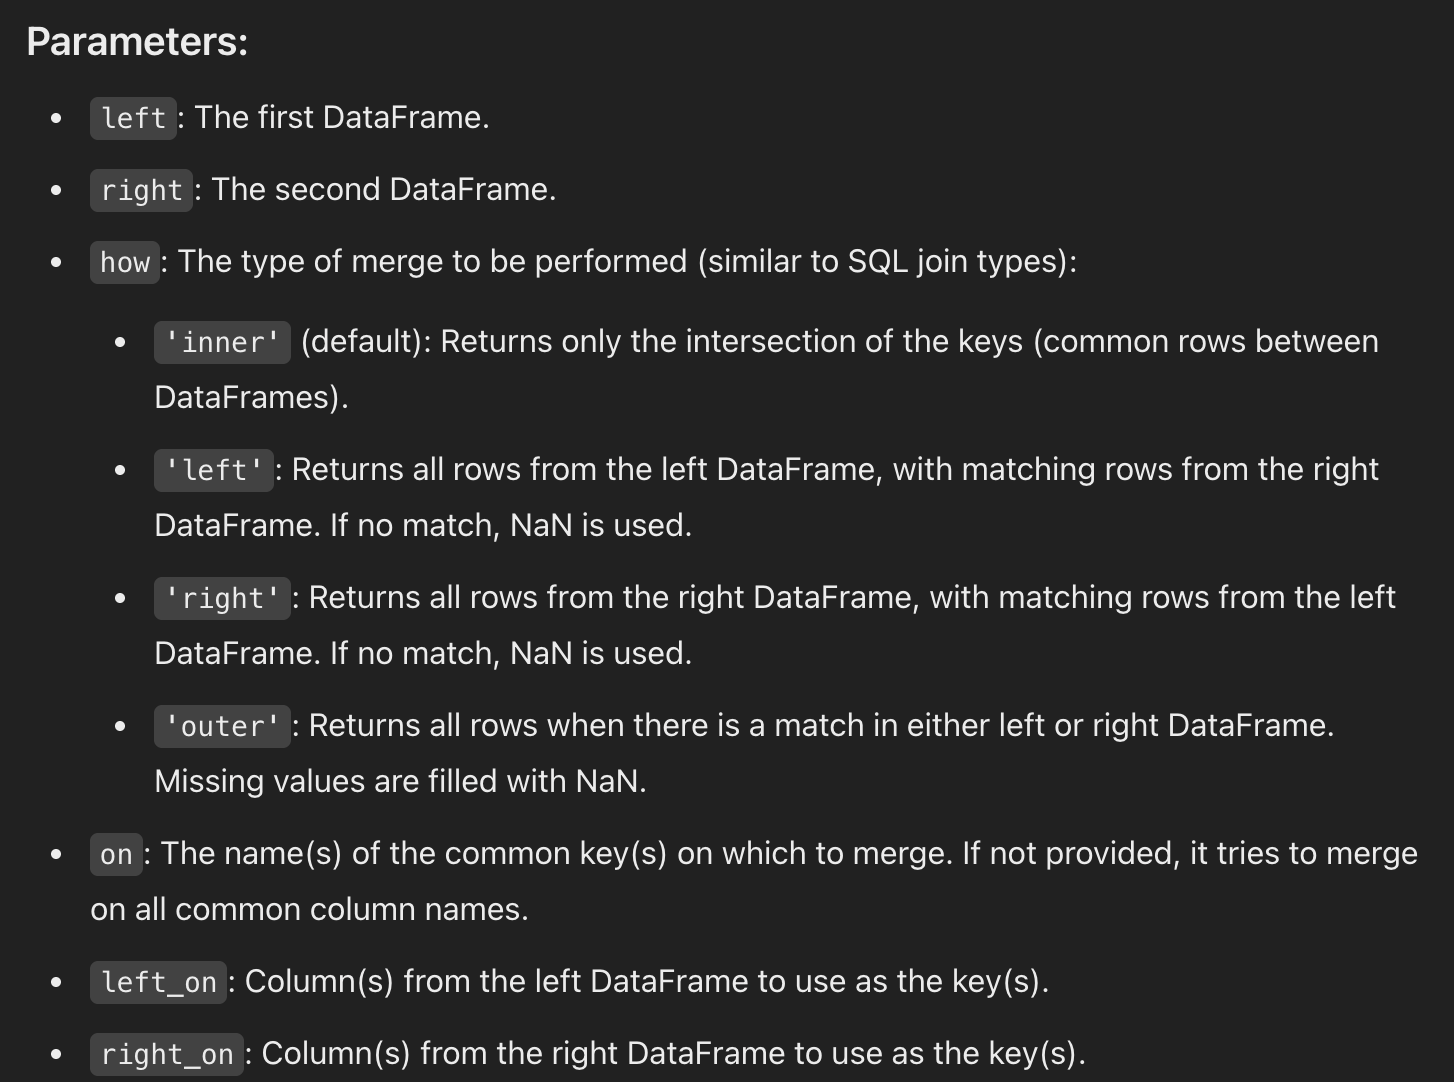


In [165]:
df1 = pd.DataFrame({'someKey': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'someKey': ['B', 'C', 'D'], 'value2': [4, 5, 6]})

In [166]:
df1

,someKey,value1
0,A,1
1,B,2
2,C,3


In [167]:
df2

,someKey,value2
0,B,4
1,C,5
2,D,6


In [168]:
# Merge the two DataFrames on the 'someKey' column
result = pd.merge(df1, df2, on='someKey')
result

,someKey,value1,value2
0,B,2,4
1,C,3,5


Assume that key columns are different names

In [169]:
df1 = pd.DataFrame({'someKey1': ['A', 'B', 'C'], 'value1': [1, 2, 3]})
df2 = pd.DataFrame({'someKey2': ['B', 'C', 'D'], 'value2': [4, 5, 6]})

In [170]:
df1

,someKey1,value1
0,A,1
1,B,2
2,C,3


In [171]:
df2

,someKey2,value2
0,B,4
1,C,5
2,D,6


In [172]:
result = pd.merge(df1, df2, left_on='someKey1', right_on="someKey2")
result

,someKey1,value1,someKey2,value2
0,B,2,B,4
1,C,3,C,5


## Let's check the join types



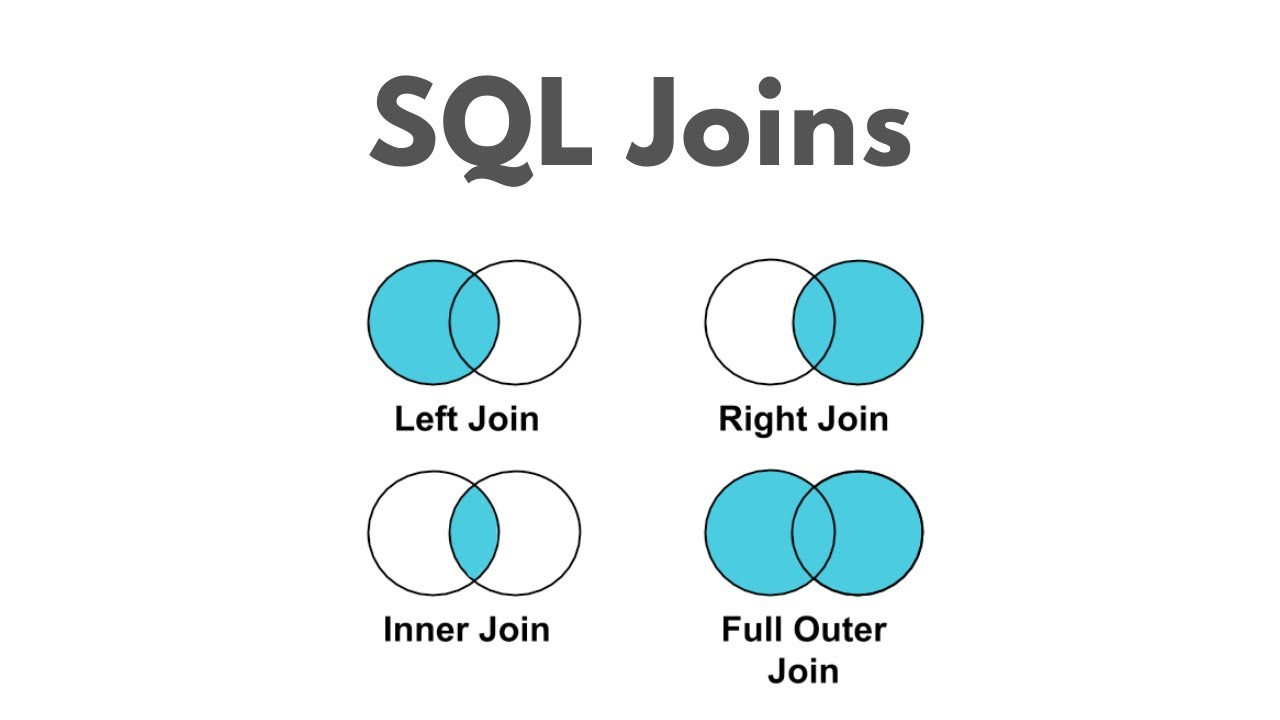

In [173]:
# it's inner by default
result = pd.merge(df1, df2, left_on='someKey1', right_on="someKey2", how="inner")
result

,someKey1,value1,someKey2,value2
0,B,2,B,4
1,C,3,C,5


In [174]:
result = pd.merge(df1, df2, left_on='someKey1', right_on="someKey2", how="left")
result

,someKey1,value1,someKey2,value2
0,A,1,NaN,NaN
1,B,2,B,4.0
2,C,3,C,5.0


In [175]:
result = pd.merge(df1, df2, left_on='someKey1', right_on="someKey2", how="right")
result

,someKey1,value1,someKey2,value2
0,B,2.0,B,4
1,C,3.0,C,5
2,NaN,NaN,D,6


In [176]:
result = pd.merge(df1, df2, left_on='someKey1', right_on="someKey2", how="outer")
result

,someKey1,value1,someKey2,value2
0,A,1.0,NaN,NaN
1,B,2.0,B,4.0
2,C,3.0,C,5.0
3,NaN,NaN,D,6.0
